                                                            TASK -4 IMPLEMENTATION

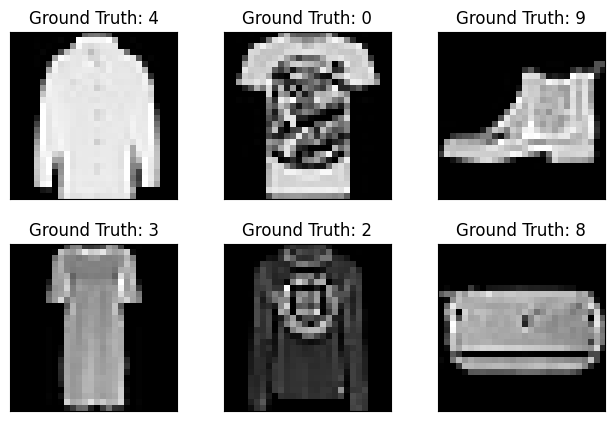

Number of epochs: 3 || Batch_size: 32 || Dropout: 0.1 || Kernel size: 3 || {1: tensor(81.7100), 2: tensor(84.9500), 3: tensor(85.2300)}
Number of epochs: 3 || Batch_size: 32 || Dropout: 0.1 || Kernel size: 5 || {1: tensor(80.8500), 2: tensor(83.4000), 3: tensor(85.5900)}
Number of epochs: 3 || Batch_size: 32 || Dropout: 0.2 || Kernel size: 3 || {1: tensor(82.7000), 2: tensor(85.1900), 3: tensor(84.5400)}
Number of epochs: 3 || Batch_size: 32 || Dropout: 0.2 || Kernel size: 5 || {1: tensor(76.9200), 2: tensor(81.9100), 3: tensor(85.5100)}
Number of epochs: 3 || Batch_size: 32 || Dropout: 0.3 || Kernel size: 3 || {1: tensor(81.3000), 2: tensor(84.3800), 3: tensor(86.0200)}
Number of epochs: 3 || Batch_size: 32 || Dropout: 0.3 || Kernel size: 5 || {1: tensor(79.6900), 2: tensor(83.2800), 3: tensor(85.3600)}
Number of epochs: 3 || Batch_size: 32 || Dropout: 0.4 || Kernel size: 3 || {1: tensor(79.5700), 2: tensor(81.5100), 3: tensor(85.0900)}
Number of epochs: 3 || Batch_size: 32 || Dropout

In [128]:
#  Created by SHIRISH KISHORE KUMAR & SOORYA
#  Created on 04/10/2023
import os
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
#Create a directory to store the data
data_dir = "/Users/shirish/Downloads/data_fashion_mnist"
#Check if the directory exists
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
#Defining the hyperparameters
n_epochs = 10
batch_size_train = 32
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
#Creating the 4 dimensional evaluation process for task-4 of project-5
epoch_list = [3,4,5]
batch_size_list = [32,64,128,256,512]
dropout_list = [0.1,0.2,0.3,0.4]
kernel_size_list = [3,5]
#Creating the empty lists to store the results
store_accuracy = []
store_epoch = []
#Creating the empty dictionary to store the results
dictionary = {}
#Creating the training data using the FashionMNIST dataset
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.FashionMNIST(
        '~/fashion_mnist_data', train=True, download=True,
        transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(
                (0.1307,), (0.3081,))
        ])),
    batch_size=batch_size_train, shuffle=True)
#Creating the testing data using the FashionMNIST dataset
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.FashionMNIST(
        '~/fashion_mnist_data', train=False, download=True,
        transform=torchvision.transforms.Compose([
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(
                (0.1307,), (0.3081,))
        ])),
    batch_size=batch_size_test, shuffle=True)
#printing the shape of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape
#Plotting the first 6 images of the training data
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

#Creating a loop to iterate through the 4 dimensional evaluation process
#First loop for epoch
for i in epoch_list:
    n_epochs = i
    #Second loop for batch size
    for j in batch_size_list:
        batch_size_train = j
        #Third loop for dropout
        for k in dropout_list:
            dropout = k
            #Fourth loop for kernel size
            for l in kernel_size_list:
                filter_size = l
                #Defining the flatten value based on the kernel size
                if filter_size == 3:
                    flatten_value = 375
                elif filter_size == 5:
                    flatten_value = 240
                #Defining the module
                #Reference:
                #https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
                class Net(nn.Module):
                    def __init__(self):
                        super(Net, self).__init__()
                        self.fmnist_net = nn.Sequential(
                        nn.Conv2d(1, 5, kernel_size=l),
                        nn.ReLU(),
                        nn.Conv2d(5, 10, kernel_size=l),
                        nn.MaxPool2d(2),
                        nn.ReLU(),
                        nn.Conv2d(10, 15, kernel_size=3),
                        nn.MaxPool2d(2),
                        nn.ReLU(),
                        nn.Flatten(),
                        nn.Linear(flatten_value, 100),
                        nn.Dropout1d(dropout),
                        nn.Linear(100, 10),
                        )
                    #Defining the forward function
                    def forward(self, x):
                        x = self.fmnist_net(x)
                        return F.log_softmax(x, dim=1)
                #Creating the network
                network = Net()
                #Defining the optimizer
                optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                    momentum=momentum)
                #Creating the empty lists to store the results
                train_losses = []
                train_counter = []
                test_losses = []
                test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
                #Defining the training and testing functions
                def train(epoch):
                    network.train()
                    for batch_idx, (data, target) in enumerate(train_loader):
                        optimizer.zero_grad()
                        output = network(data)
                        loss = F.nll_loss(output, target)
                        loss.backward()
                        optimizer.step()
                        if batch_idx % log_interval == 0:
                            #print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                            #    epoch, batch_idx * len(data), len(train_loader.dataset),
                            #    100. * batch_idx / len(train_loader), loss.item()))
                            train_losses.append(loss.item())
                        train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
                        torch.save(network.state_dict(), '/Users/shirish/trained model/model.pth')
                        torch.save(optimizer.state_dict(), '/Users/shirish/trained model/optimizer.pth')
                #Defining the testing function
                def test(epoch):
                    network.eval()
                    test_loss = 0
                    correct = 0
                    with torch.no_grad():
                        for data, target in test_loader:
                            output = network(data)
                            test_loss += F.nll_loss(output, target, reduction='sum').item()
                            pred = output.data.max(1, keepdim=True)[1]
                            correct += pred.eq(target.data.view_as(pred)).sum()
                    
                    test_loss /= len(test_loader.dataset)
                    test_losses.append(test_loss)
                    #print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                    #    test_loss, correct, len(test_loader.dataset),
                    #    100. * correct / len(test_loader.dataset)))
                    #Storing the epoch and accuracy in the lists
                    store_epoch.append(epoch)
                    store_accuracy.append(100. * correct / len(test_loader.dataset))
                #Calling the training and testing functions
                for epoch in range(1, n_epochs + 1):
                    train(epoch)
                    test(epoch)
                #Printing the results
                for i in range(len(store_accuracy)):
                    dictionary[store_epoch[i]] = store_accuracy[i]
                print("Number of epochs:",n_epochs,"||","Batch_size:",batch_size_train,"||","Dropout:",dropout ,"||","Kernel size:",filter_size,"||" ,dictionary)
